In [99]:
##EDA Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import scipy


import util_diagnostic
import util_visualization
import util_preprocessing
import util_calculation
import util_modelling

def reload():
    importlib.reload(util_diagnostic)
    importlib.reload(util_visualization)
    importlib.reload(util_preprocessing)
    importlib.reload(util_calculation)
    importlib.reload(util_modelling)
file_name = "./Data-final_converted1.csv"
df = pd.read_csv(file_name)
columns = df.columns
df.head()

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Lama_Kuliah,Fakultas
0,Pria,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,Ekskul_4,Kos,Belum,Beasiswa,"3,5",DKV
1,Wanita,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,Ekskul_4,NaN,Belum,NaN,4,FIKOM
2,Wanita,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,Ekskul_1,NaN,Bekerja,Beasiswa,"4,5",FIKOM
3,Wanita,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,Ekskul_4,Orang Tua,Belum,Beasiswa,"5,5",DKV
4,Wanita,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,Ekskul_2,Orang Tua,Bekerja,NaN,"6,5",DKV


In [100]:
row, column = df.shape
print('Row =', row, ', Column =',column)

Row = 11499 , Column = 17


### Statistical Representatin

In [101]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bahasa,11499.0,74.350570,8.229366,60.1,67.3,74.2,81.40,88.6
Inggris,11499.0,74.387599,8.302509,60.1,67.2,74.5,81.60,88.6
TIK,10932.0,74.239810,8.200480,60.1,67.1,74.2,81.30,88.6
Matematika,11499.0,74.443534,8.240524,60.1,67.4,74.5,81.60,88.6
Fisika,11499.0,74.352692,8.264629,60.1,67.3,74.4,81.40,88.6
Kimia,11499.0,74.334820,8.279217,60.1,67.2,74.2,81.50,88.6
Biologi,11499.0,74.349691,8.259486,60.1,67.3,74.3,81.60,88.6
Geografi,11499.0,74.283755,8.245244,60.1,67.1,74.4,81.35,88.6
Sosiologi,10928.0,74.217258,8.225752,60.1,67.1,74.2,81.40,88.6
Antropologi,10823.0,74.166682,8.289890,60.1,66.9,74.0,81.40,88.6


### Check Data Information

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           11499 non-null  object 
 1   Bahasa           11499 non-null  float64
 2   Inggris          11499 non-null  float64
 3   TIK              10932 non-null  float64
 4   Matematika       11499 non-null  float64
 5   Fisika           11499 non-null  float64
 6   Kimia            11499 non-null  float64
 7   Biologi          11499 non-null  float64
 8   Geografi         11499 non-null  float64
 9   Sosiologi        10928 non-null  float64
 10  Antropologi      10823 non-null  float64
 11  Extra_Kurikuler  11499 non-null  object 
 12  Tinggal_Dengan   7517 non-null   object 
 13  Status_Kerja     11499 non-null  object 
 14  Biaya            7720 non-null   object 
 15  Lama_Kuliah      11499 non-null  object 
 16  Fakultas         11499 non-null  object 
dtypes: float64(1

### Check Missing Value

In [103]:
reload()
miss_val_df = util_diagnostic.getSumAndPercentageOfMissingValues(df)
miss_val_df

,Sum Missing Values,Percentage Missing Values(%)
Gender,0,0.000000
Bahasa,0,0.000000
Inggris,0,0.000000
TIK,567,4.930864
Matematika,0,0.000000
Fisika,0,0.000000
Kimia,0,0.000000
Biologi,0,0.000000
Geografi,0,0.000000
Sosiologi,571,4.965649


### Check Duplicate Data

In [104]:
print("Number of Duplicate Data =", df.duplicated().sum())

Number of Duplicate Data = 0


In [105]:
util_visualization.drawCountPlot(df, "Fakultas", "Fakultas", percentage=False)

In [106]:
numCols = [
    "Bahasa",
    "Inggris",
    "TIK",
    "Matematika",
    "Fisika",
    "Kimia",
    "Biologi",
    "Geografi",
    "Sosiologi",
    "Antropologi"]

In [107]:
reload()
util_visualization.drawHeatmap(np.round(df[numCols].corr(),2),numCols, numCols, "Korelasi Linear Antara Nilai Numerik" )

In [108]:
reload()
for i in numCols:
    if(i == "Inggris" or i == "Bahasa"):
        util_visualization.drawHistogram(df, i, 10).show()

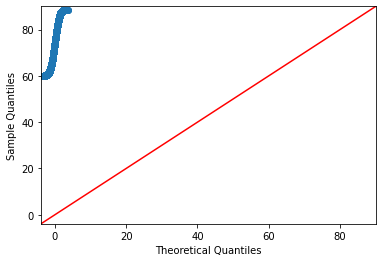

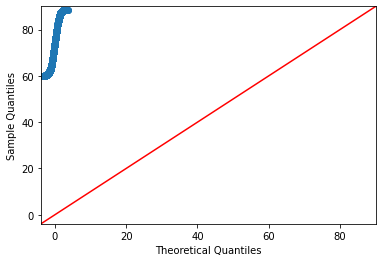

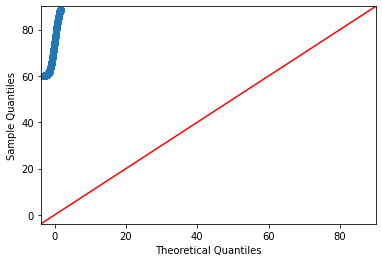

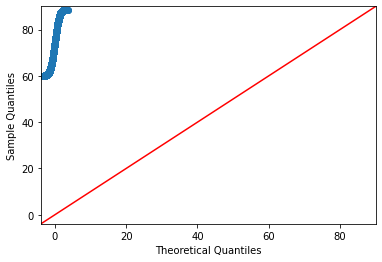

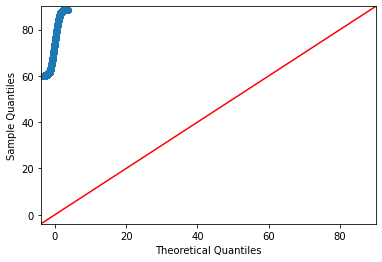

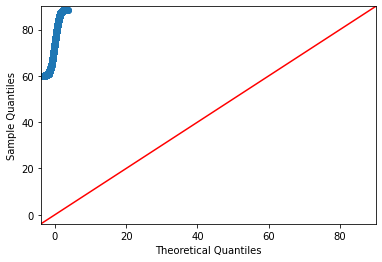

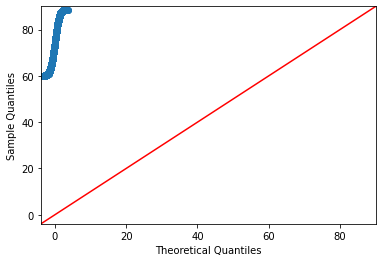

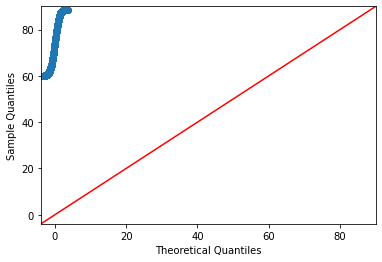

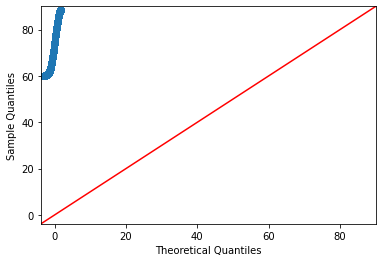

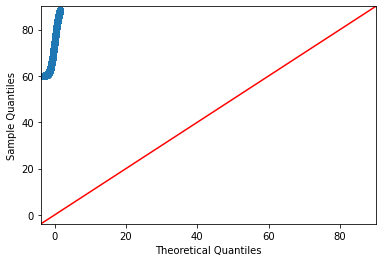

In [109]:
reload()
for i in numCols:
    util_visualization.drawQQPlot(df[i].values)

### Check Outliers

In [110]:
import plotly.express as px
for col in df.columns:
    if df[col].dtypes == 'object':
        pass
    else:
        util_visualization.drawBoxPlot(df, col, title='Box plot column ' + col)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        numberOfOutliers = util_calculation.getOutlierValue(df,col,Q1,Q3,IQR)
        print("the number of outliers found in the column",col,numberOfOutliers)
        print("===========================================================")


the number of outliers found in the column Bahasa 0


the number of outliers found in the column Inggris 0


the number of outliers found in the column TIK 0


the number of outliers found in the column Matematika 0


the number of outliers found in the column Fisika 0


the number of outliers found in the column Kimia 0


the number of outliers found in the column Biologi 0


the number of outliers found in the column Geografi 0


the number of outliers found in the column Sosiologi 0


the number of outliers found in the column Antropologi 0


### Check Normal Distribution and Skewness